In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.options.display.float_format = '{:.4f}'.format
sns.set()

In [31]:
# load dataset
df = pd.read_csv("bike.csv")
df.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
0,SPRING,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.1758,80.5833,10.7499,985,0
1,SPRING,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.0835,69.6087,16.6521,801,1
2,SPRING,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.2291,43.7273,16.6367,1349,2


In [32]:
# dummy encode categorical columns
df = pd.get_dummies(data=df)
df.head(3)

,yr,temp,hum,windspeed,cnt,days_since_2011,season_FALL,season_SPRING,season_SUMMER,season_WINTER,mnth_APR,mnth_AUG,mnth_DEC,mnth_FEB,mnth_JAN,mnth_JUL,mnth_JUN,mnth_MAR,mnth_MAY,mnth_NOV,mnth_OCT,mnth_SEP,holiday_HOLIDAY,holiday_NO HOLIDAY,weekday_FRI,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED,workingday_NO WORKING DAY,workingday_WORKING DAY,weathersit_GOOD,weathersit_MISTY,weathersit_RAIN/SNOW/STORM
0,2011,8.1758,80.5833,10.7499,985,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
1,2011,9.0835,69.6087,16.6521,801,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
2,2011,1.2291,43.7273,16.6367,1349,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0


In [33]:
# scale data  
scale = StandardScaler()
num_cols = ['yr','temp','hum','windspeed']
data = scale.fit_transform(df[num_cols])
data = pd.DataFrame(data,columns=num_cols)
df = pd.concat([df.drop(num_cols,axis=1),data],axis=1,ignore_index=False,sort=False)
df.head(3)

,cnt,days_since_2011,season_FALL,season_SPRING,season_SUMMER,season_WINTER,mnth_APR,mnth_AUG,mnth_DEC,mnth_FEB,mnth_JAN,mnth_JUL,mnth_JUN,mnth_MAR,mnth_MAY,mnth_NOV,mnth_OCT,mnth_SEP,holiday_HOLIDAY,holiday_NO HOLIDAY,weekday_FRI,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED,workingday_NO WORKING DAY,workingday_WORKING DAY,weathersit_GOOD,weathersit_MISTY,weathersit_RAIN/SNOW/STORM,yr,temp,hum,windspeed
0,985,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,-1.0014,-0.8267,1.2502,-0.3879
1,801,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,-1.0014,-0.7211,0.4791,0.7496
2,1349,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,-1.0014,-1.6347,-1.3393,0.7466


In [34]:
# train simple model
y = df['cnt']
x = df.drop('cnt', axis=1)

lr = LinearRegression()
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# check rmse
predict = lr.predict(x)
mean_squared_error(y, predict,squared=False)

752.4578264542649

In [36]:
# compute feature importance
results = permutation_importance(lr, x, y, scoring='neg_mean_squared_error', random_state=0)
print(results)

{'importances_mean': array([ 3.77632185e+06,  3.62399609e+00,  2.75522586e+05,  2.10089687e+03,
        2.21443774e+05,  2.46687146e+04,  1.64780095e+04,  7.58802034e+04,
        1.75334666e+05,  3.22356922e+05,  7.68659971e+03,  5.07128157e+02,
        4.09002397e+04,  1.11114830e+03,  3.35930422e+04,  1.29714708e+05,
        1.86903918e+05,  1.51387199e+03,  1.51387199e+03, -5.82421439e+01,
        3.64883559e+03,  1.53457821e+04,  6.01711845e+03,  1.70086283e+02,
        5.31628364e+02,  8.59459819e+01,  4.51943271e+03,  4.51943271e+03,
        3.21347514e+05,  4.82036831e+04,  6.85527919e+04,  9.67929702e+06,
        1.41323300e+06,  8.70708411e+04,  9.24608055e+04]), 'importances_std': array([2.04045306e+05, 1.89121221e+02, 1.47595409e+04, 1.48995269e+03,
       3.05942878e+04, 3.60133593e+03, 5.54878059e+03, 7.20893742e+03,
       1.79230140e+04, 1.78908019e+04, 4.75647572e+03, 4.94991850e+02,
       9.01085205e+03, 7.81681027e+02, 6.53319434e+03, 1.84431799e+04,
       1.8474339

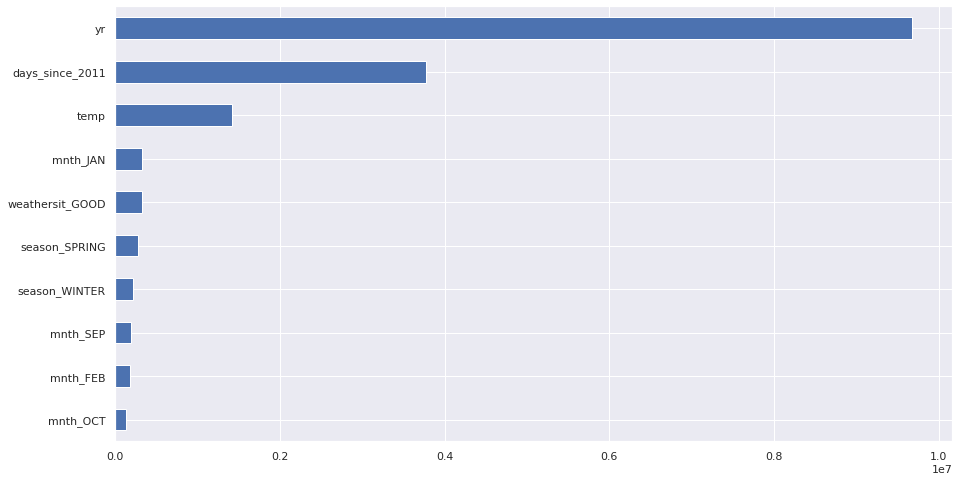

In [37]:
# get importance
importance = results['importances_mean']
feat_importances = pd.Series(importance, index=x.columns)
feat_importances.sort_values(ascending=True).tail(10).plot(kind='barh',figsize=(15,8)) 

In [38]:
feat_importances.sum()

17038501.447303146